In [1]:
from functools import partial
import matplotlib.pyplot as plt
from teyssier.sedov import sedovana
from superfv import EulerSolver, initial_conditions, plot_1d_slice, plot_2d_slice

In [2]:
N = 64
T = 0.8
gamma = 1.4

sim0 = EulerSolver(
    ic=partial(initial_conditions.sedov, gamma=gamma, h=1 / N, P0=1e-5),
    bcx=("reflective", "free"),
    bcy=("reflective", "free"),
    gamma=gamma,
    riemann_solver="hllc",
    CFL=0.8,
    nx=N,
    ny=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    include_corners=True,
    MUSCL_limiter="moncen",
)

sim = EulerSolver(
    ic=partial(initial_conditions.sedov, gamma=gamma, h=1 / N, P0=1e-5),
    bcx=("reflective", "free"),
    bcy=("reflective", "free"),
    gamma=gamma,
    riemann_solver="hllc",
    CFL=0.8,
    nx=N,
    ny=N,
    p=3,
    flux_recipe=2,
    lazy_primitives=True,
    # GL=True,
    # ZS=True,
    include_corners=True,
    MOOD=True,
    cascade="muscl",
    max_MOOD_iters=1,
    NAD=True,
    NAD_rtol=1e-2,
    NAD_atol=1e-7,
    PAD={"rho": (0, None), "P": (0, None)},
    cupy=True,
)

In [3]:
sim0.musclhancock(T)

Step #1110 @ t=8.00e-01 | dt=5.18e-04 | min(rho)=2.46e-03, min(P)=1.00e-05 | (done)                 


In [4]:
sim.ssprk3(T)

Step #1126 @ t=8.00e-01 | dt=1.08e-04 | min(rho)=2.41e-03, min(P)=1.00e-05 | (done)                 


In [5]:
dim = 2
E0 = 1
rho0 = 1

r, d, u, P = sedovana(gamma, dim)

r *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (2 / (dim + 2))
d *= rho0
u *= (E0 / rho0) ** (1.0 / (dim + 2)) * T ** (-dim / (dim + 2))
P *= (E0 / rho0) ** (2.0 / (dim + 2)) * T ** (-2 * dim / (dim + 2)) * rho0

chi0=np.float64(1.0018778777154949)


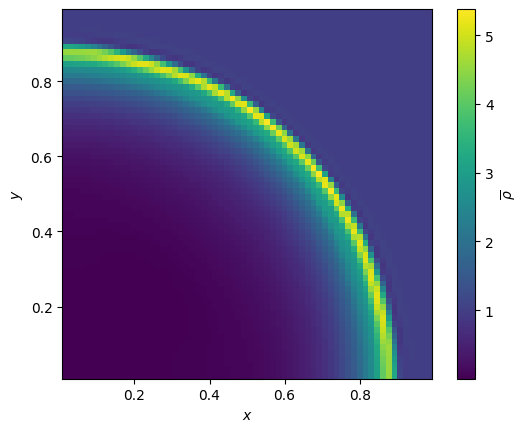

In [6]:
fig, ax = plt.subplots()

plot_2d_slice(
    sim,
    ax,
    "rho",
    cell_averaged=True,
)

# add colorbar
cbar = plt.colorbar(ax.images[0], ax=ax)
cbar.set_label(r"$\overline{\rho}$")

/home/jp7427/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.0078125
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.0078125
  warnings.warn(


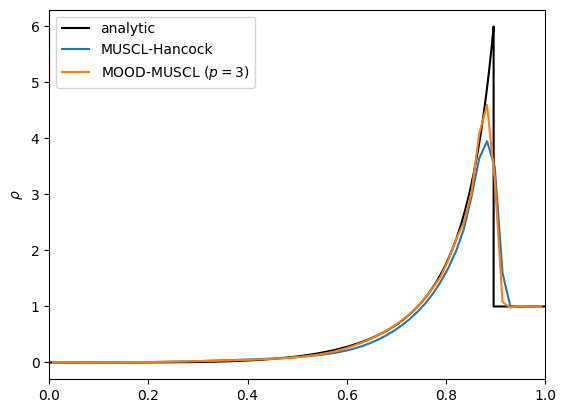

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylabel(r"$\rho$")

ax.plot(r, d, label="analytic", color="black")
plot_1d_slice(sim0, ax, "rho", y=0, label="MUSCL-Hancock")
# plot_1d_slice(sim, ax, "rho", y=0, label=fr"ZS $(p={sim.p})$")
plot_1d_slice(sim, ax, "rho", y=0, label=rf"MOOD-MUSCL $(p={sim.p})$")

ax.legend()

In [8]:
sim0.print_timings()

Routine                      # of calls  Total time (s) % time
---------------------------  ----------  --------------  ------
wall                                  1            4.78   100.0
take_step                          1110            4.74    99.2
compute_dt                         1110            0.12     2.4
apply_bc                           1112            0.05     1.0
riemann_solver                     2220            1.34    28.1
zhang_shu_limiter                     0               -       -
MOOD_loop                             0               -       -
      detect_troubled_cells           0               -       -
      revise_fluxes                   0               -       -
snapshot                              2            0.01     0.1
minisnapshot                       1111            0.03     0.5


In [9]:
sim.print_timings()

Routine                      # of calls  Total time (s) % time
---------------------------  ----------  --------------  ------
wall                                  1           84.47   100.0
take_step                          1126           84.18    99.7
compute_dt                         1126            0.89     1.1
apply_bc                           6758            1.83     2.2
riemann_solver                    13512           45.20    53.5
zhang_shu_limiter                     0               -       -
MOOD_loop                          3378           40.57    48.0
      detect_troubled_cells        3378            9.00    10.6
      revise_fluxes                3378           31.55    37.4
snapshot                              2            0.09     0.1
minisnapshot                       1127            0.19     0.2
